# <font color=blue> **Ciência dos Dados** - Projeto 1</font>
#### Beatriz Mie Kostubo Kuwabara </font>

### <u>Introdução</u>
Neste projeto foram feitas análises exploratórias de dados estatísticos dos países, correlacionando o Índice de Desenvolvimento Humano (IDH) com duas variáveis retiradas do site: https://www.gapminder.org/data/, utilizando os códigos aprendidos da biblioteca pandas.
#### Indicadores analisados:
- IDH
- Consumo de açúcar por pessoa (em grama por dia)
- Preço da gasolina (em US$ por litro)

Considerando as variáveis escolhidas para análise, busca-se estabelecer a relação entre elas, baseando-se na hipótese de que quanto maior o IDH de um país, maior o consumo de açúcar por pessoa e mais baixo o preço da gasolina, considerando que a qualidade de vida é melhor, e, consequentemente, mais abastada é a população, o que torna a gasolina mais acessível, e, portanto, mais barata, e torna o consumo de alimentos com alto índice de açúcar mais frequente, posto que há alimentos disponível para toda a população de modo abundante. Diante dessa suposição, pretende-se utilizar noções de análise de dados aplicados em python, para se responder a pergunta que segue:

#### Tendo em vista o cenário socioeconômico mundial do ano de 2000, como o Índice de Desenvolvimento Humano, calculado pela expectativa de vida ao nascer, educação e PIB per capita influencia no consumo de açúcar por pessoa (em gramas por dia) e no preço da gasolina (em US$ por litro)?

### <u>Análises</u>

Importação das bibliotecas a serem utilizadas

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

Aqui foram abertos e lidos os arquivos dos dados em excel e salvos em variáveis:

In [3]:
index = pd.read_excel('indicator_HDI.xlsx')
sugar = pd.read_excel('indicator sugar_consumption.xlsx')
gas = pd.read_excel('indicator EP_PMP_SGAS_CD.xlsx')

In [4]:
index_idx = index.set_index('HDI')
sugar_idx = sugar.set_index('geo')
gas_idx = gas.set_index('geo')

#### Análise das três variáveis para o ano de 2000

In [5]:
index_2000 = index_idx.loc[:, [2000]]
sugar_2000 = sugar_idx.loc[:, [2000]]
gas_2000 = gas_idx.loc[:, [2000]]

In [6]:
ind = index_2000.rename(index=str, columns=lambda column: "HDI in " + str(column))
sug = sugar_2000.rename(index=str, columns=lambda column: "Sugar in " + str(column))
pump = gas_2000.rename(index=str, columns=lambda column: "Gas in " + str(column))

Os dados das três variáveis para o ano de 2000 foram juntados em um único dataframe:

In [7]:
df = ind.join(sug, how='inner')
data = df.join(pump, how="inner")

In [8]:
cd = data.dropna(how="any")

Para salvar os arquivos em formato .csv e .xlsx:

In [9]:
cd.to_csv('Projeto 1.csv', index=True)
cd.to_excel('Projeto 1.xlsx', index=True)

Para apresentar os dados amostrais de cada variável:

In [10]:
cd.describe()

,HDI in 2000,Sugar in 2000,Gas in 2000
count,121.000000,121.000000,121.000000
mean,0.618298,84.162397,0.627190
std,0.185380,44.809632,0.248097
min,0.224000,2.740000,0.050000
25%,0.451000,46.580000,0.460000
50%,0.634000,84.930000,0.620000
75%,0.770000,117.810000,0.770000
max,0.913000,194.520000,1.190000


Aqui foi plotada a matriz de dispersão para o ano de 2000, que compara as três variáveis em gráficos de dispersão e histogramas:

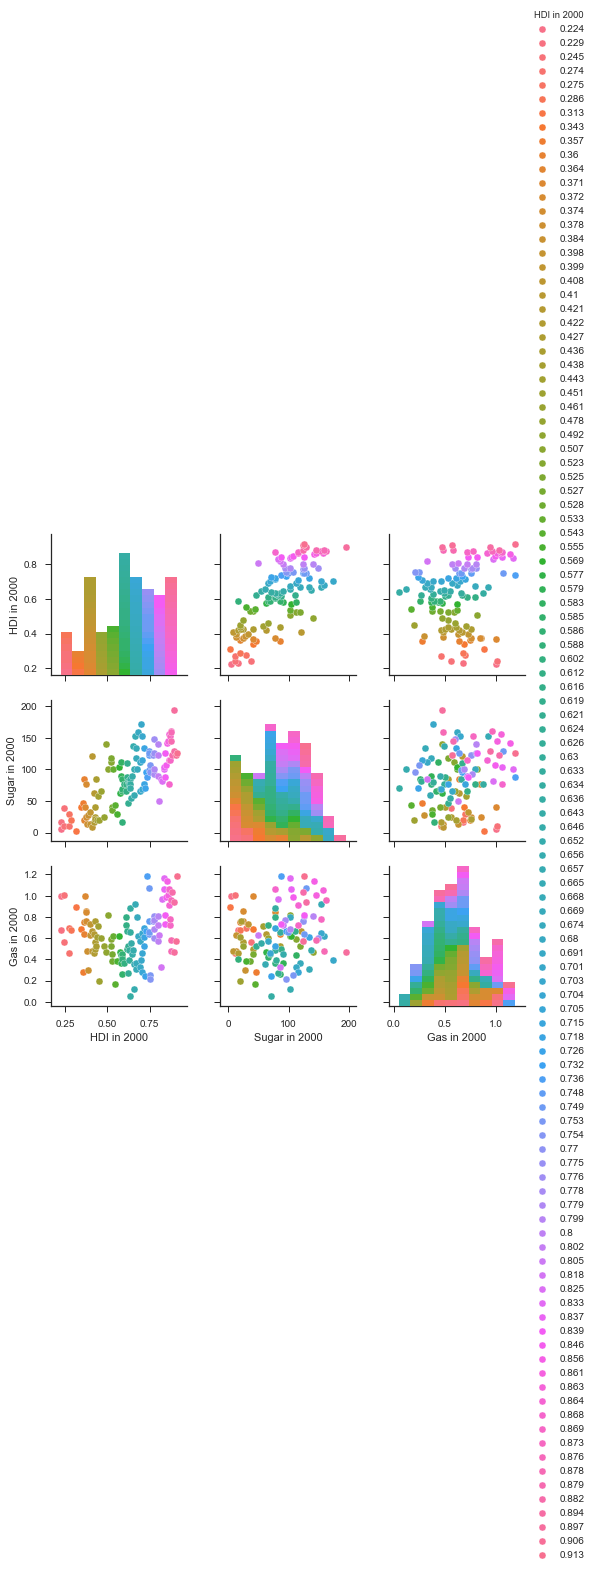

In [14]:
sns.set(style="ticks")
sns.pairplot(cd,hue="HDI in 2000")

Aqui foi plotada a matriz de regressão com a linha de tendência linear dos dados analisados:

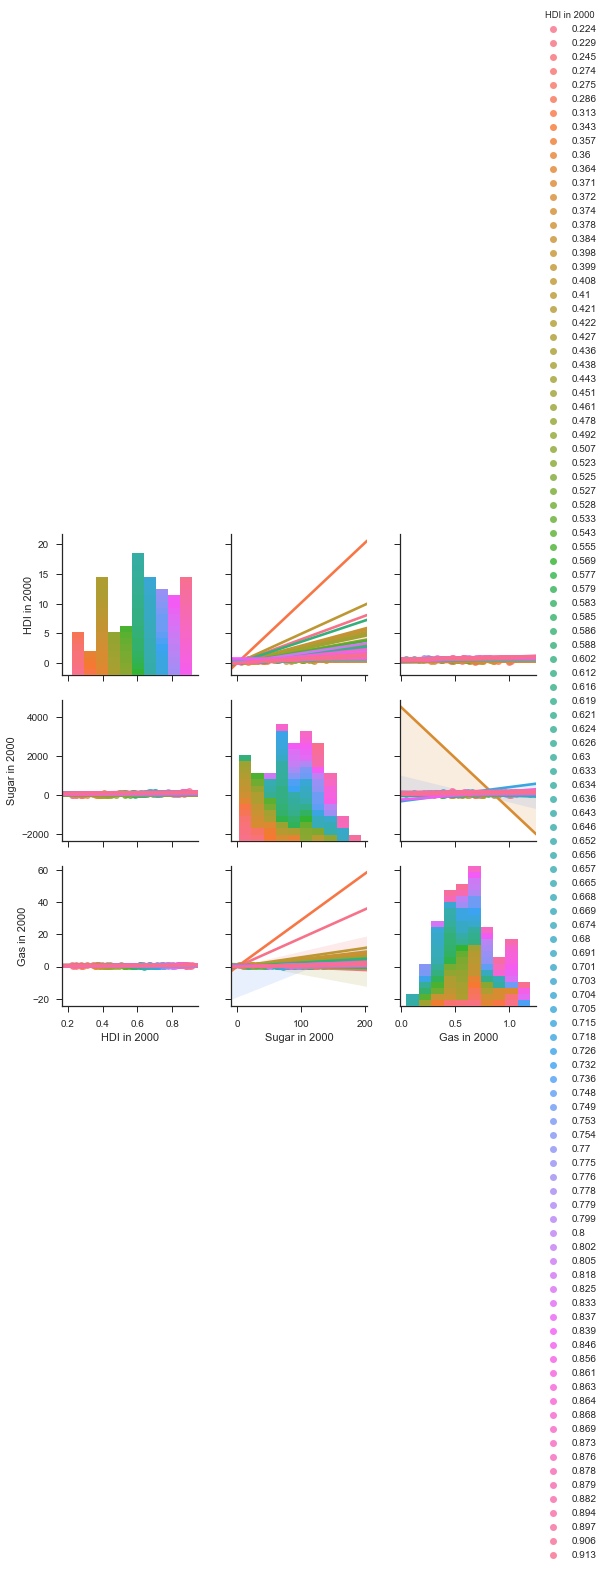

In [15]:
sns.set(style="ticks")
sns.pairplot(cd, kind="reg", hue="HDI in 2000")

Aqui foi calculada a correlação dos dados apresentados para as três variáveis:

In [16]:
cd.corr()

,HDI in 2000,Sugar in 2000,Gas in 2000
HDI in 2000,1.000000,0.754092,0.197566
Sugar in 2000,0.754092,1.000000,0.164330
Gas in 2000,0.197566,0.164330,1.000000


Foi definida a função que recebe os dados de duas variáveis em algum ano, e retorna o gráfico e a reta de tendência que relaciona tais dados:

In [17]:
def reta(dados_x, dados_y, nome_x, nome_y, c):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()

    print('Ajuste linear entre ',nome_x,'  e ',nome_y,':')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)

    fig = plt.figure(figsize=(8, 6))
    sns.regplot(dados_x, dados_y, color=(c))
    plt.title(nome_x + " versus "+ nome_y)
    plt.xlabel(nome_x)
    plt.ylabel(nome_y)

    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color=(c))

    plt.tight_layout()
    plt.grid()
    plt.show()

Gráficos relacionando as três variáveis, duas a duas, para o ano de 2000:

Ajuste linear entre  IDH   e  Consumo de Açúcar :
Coeficiente linear: -28.53920683841119
Coeficiente angular: 182.27730140679222


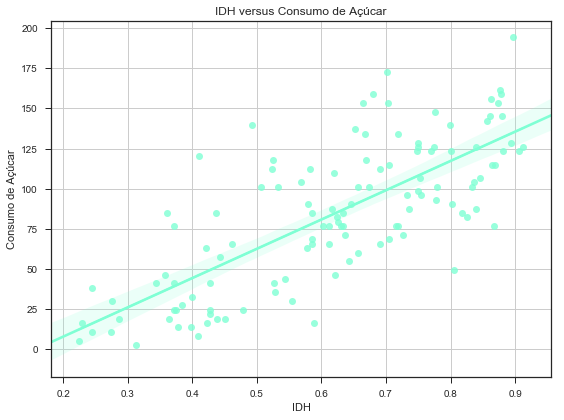

In [18]:
reta(cd["HDI in 2000"],cd["Sugar in 2000"],"IDH","Consumo de Açúcar", 'aquamarine')

Ajuste linear entre  IDH   e  Preço da Gasolina :
Coeficiente linear: 0.4637088929687034
Coeficiente angular: 0.26440537673145276


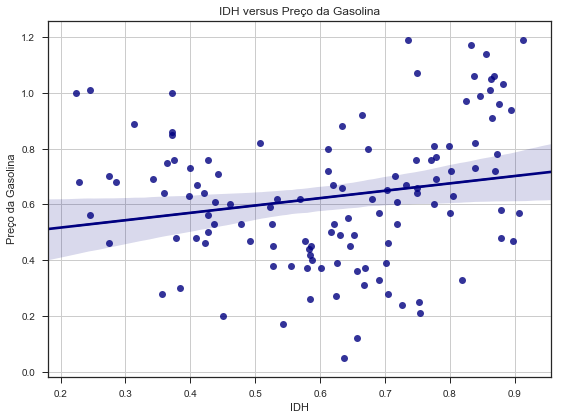

In [19]:
reta(cd["HDI in 2000"],cd["Gas in 2000"],"IDH","Preço da Gasolina", 'navy')

Ajuste linear entre  Consumo de Açúcar   e  Preço da Gasolina :
Coeficiente linear: 0.5506156458217112
Coeficiente angular: 0.0009098414379493559


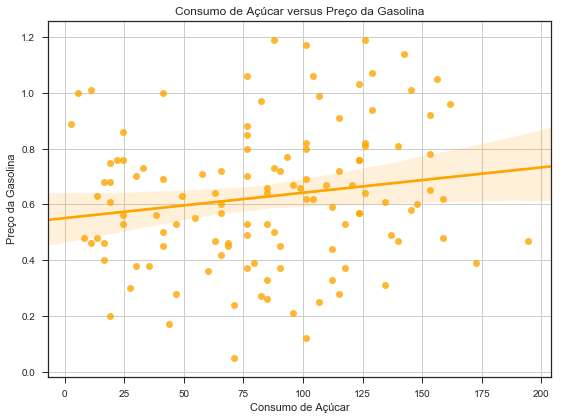

In [20]:
reta(cd["Sugar in 2000"],cd["Gas in 2000"],"Consumo de Açúcar","Preço da Gasolina", 'orange')

Foi plotado o gráfico que compara as três variáveis juntas:

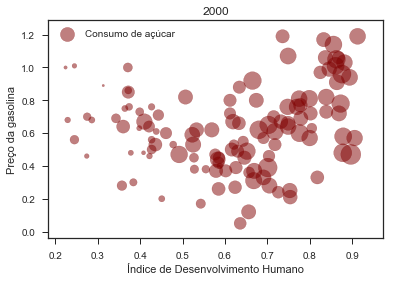

In [21]:
x = cd["HDI in 2000"]
y = cd["Gas in 2000"]
area = cd["Sugar in 2000"]/cd["Sugar in 2000"].max()* 400

plt.scatter(x, y, s=area, alpha=0.5, label = "Consumo de açúcar", color=('maroon'))
plt.title("2000")
plt.xlabel("Índice de Desenvolvimento Humano")
plt.ylabel("Preço da gasolina")
plt.legend()
plt.show()

<p>     A partir das análises dos dados, é possível observar que não parece haver uma relação entre as três variáveis, pois à medida que a frequência dos dados do Índice de Desenvolvimento Humano apresenta uma assimetria à esquerda, a frequência dos dados do consumo de açúcar por pessoa apresenta uma leve assimetria à direita, enquanto a frequência dos dados do preço da gasolina apresenta uma concentração no meio, com tendência à uma simetria, como mostra os histogramas plotados na matriz de dispersão. Dessa forma, temos que, pelo gráfico que compara as três variáveis plotado acima, os dados apresentados não aparentam apresentarem um padrão, mas sim uma aleatoriedade.
</p>

Contudo, fazendo uma análise mais minuciosa dos dados, pode-se traçar uma certa relação entre as variáveis, duas a duas. Fazendo uma comparação entre os dados do IDH e do consumo de açúcar por pessoa, há uma correlação de aproximadamente 75% entre tais variáveis. Como evidenciado no gráfico verde, a linha de tendência é ascendente e com um baixo índice de erro, visto que são poucos os pontos significativos que distam da mesma.

Ademais, analisando o IDH e o preço da gasolina, observa-se uma maior dispersão dos pontos e uma linha de tendência quase estacionária, com uma tênue associação positiva e correlação de quase 20%. Analogamente, a análise do consumo de açúcar por pessoa em relação ao preço da gasolina também apresenta tais características, com uma correlação de aproximadamente 16%.

Assim, conclui-se que há uma forte relação entre o IDH e o consumo de açúcar por pessoa, todavia, não há traços que relacionem o preço da gasolina ao IDH e nem ao consumo de açúcar, uma vez que o preço da gasolina não apresenta muitas variações para o ano de 2000, não afetando assim os outros indicadores.

Como foi analisado, não há uma forte correlação entre o preço da gasolina e o IDH, e entre o preço da gasolina e o consumo de açúcar por pessoa. No entanto, para poder tirar melhores conclusões acerca do tema, é necessário que se amplie o intervalo dos dados coletados, para fazer uma análise temporal que possibilite tirar uma conclusão mais comlpeta acerca da relação entre as variáveis.

#### Análise temporal das relações entre as variáveis

Relação entre o IDH e o consumo de açúcar no ano de 1990:

In [22]:
index_1990 = index_idx.loc[:, [1990]]
sugar_1990 = sugar_idx.loc[:, [1990]]

In [23]:
ind90 = index_1990.rename(index=str, columns=lambda column: "HDI in " + str(column))
sug90 = sugar_1990.rename(index=str, columns=lambda column: "Sugar in " + str(column))

In [24]:
df90 = ind90.join(sug90, how='inner')

In [25]:
cd90 = df90.dropna(how="any")

In [26]:
cd90.corr()

,HDI in 1990,Sugar in 1990
HDI in 1990,1.000000,0.743052
Sugar in 1990,0.743052,1.000000


Ajuste linear entre  IDH   e  Consumo de Açúcar :
Coeficiente linear: -23.172379108719355
Coeficiente angular: 182.2245594183183


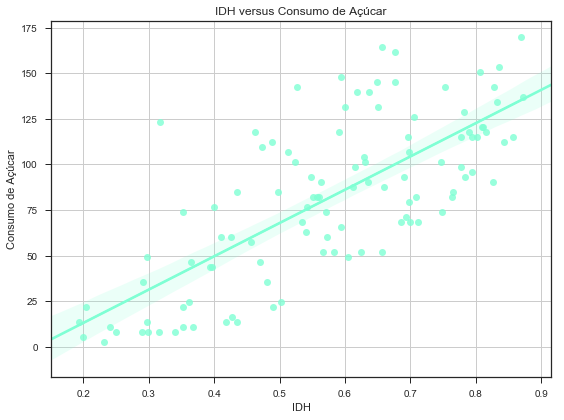

In [27]:
reta(cd90["HDI in 1990"],cd90["Sugar in 1990"],"IDH","Consumo de Açúcar","aquamarine")

Relação entre o IDH e o preço da gasolina no ano de 2006:

In [28]:
index_2006 = index_idx.loc[:, [2006]]
gas_2006 = gas_idx.loc[:, [2006]]

In [29]:
ind6 = index_2006.rename(index=str, columns=lambda column: "HDI in " + str(column))
pump6 = gas_2006.rename(index=str, columns=lambda column: "Gas in " + str(column))

In [30]:
df6 = ind6.join(pump6, how='inner')

In [31]:
cd6 = df6.dropna(how='any')

In [32]:
cd6.corr()

,HDI in 2006,Gas in 2006
HDI in 2006,1.000000,0.185915
Gas in 2006,0.185915,1.000000


Ajuste linear entre  IDH   e  Preço da gasolina :
Coeficiente linear: 0.7266698105253812
Coeficiente angular: 0.37713692363917783


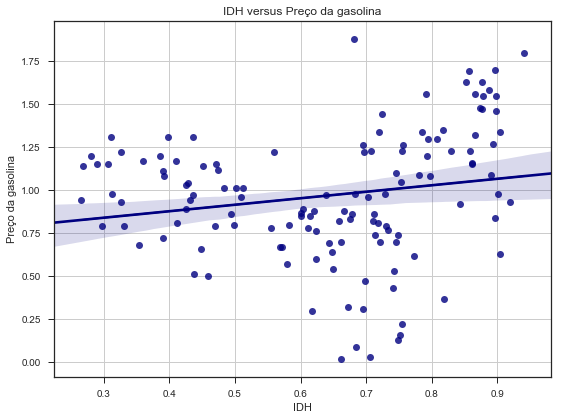

In [33]:
reta(cd6["HDI in 2006"],cd6["Gas in 2006"],"IDH","Preço da gasolina","navy")

Relação entre o consumo de açúcar e o preço da gasolina no ano de 2004:

In [34]:
sugar_2004 = sugar_idx.loc[:, [2004]]
gas_2004 = gas_idx.loc[:, [2004]]

In [35]:
sug4 = sugar_2004.rename(index=str, columns=lambda column: "Sugar in " + str(column))
pump4 = gas_2004.rename(index=str, columns=lambda column: "Gas in " + str(column))

In [36]:
df4 = sug4.join(pump4, how='inner')

In [37]:
cd4 = df4.dropna(how="any")

In [38]:
cd4.corr()

,Sugar in 2004,Gas in 2004
Sugar in 2004,1.000000,0.193704
Gas in 2004,0.193704,1.000000


Ajuste linear entre  Consumo de açúcar   e  Preço da gasolina :
Coeficiente linear: 0.7014454559764881
Coeficiente angular: 0.001554295488775247


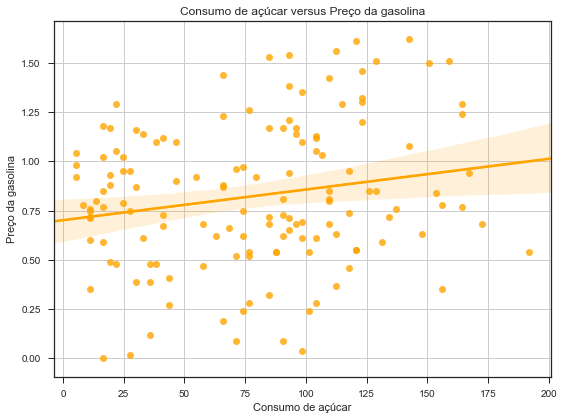

In [39]:
reta(cd4["Sugar in 2004"],cd4["Gas in 2004"],"Consumo de açúcar","Preço da gasolina","orange")

### <u>Conclusão</u>

<p align="justify"> Pelas informações obtidas no gapminder, não foi possível cruzar os dados de um mesmo ano para as três variáveis, de tal forma que as comparações foram realizadas analisando, para um mesmo ano, as variáveis duas a duas, em diferentes épocas. Para uma melhor visualização e estudo, os gráficos que comparam as mesmas variáveis foram plotados com a mesma cor.
</p>

Em meios de dar maior credibilidade à pesquisa apresentada, foi estudado, na análise temporal, o ano de 1990 para comparar o IDH com o consumo de açúcar por pessoa (gráfico verde água); o ano de 2006 para fazer comparação do IDH com o preço da gasolina (gráfico azul marinho); e, finalmente, para a comparação do consumo de açúcar por pessoa e o preço da gasolina foi analisado o ano de 2004 (gráfico laranja).

Os gráficos plotados para os outros anos analisados seguem a mesma tendência do que a virada do milênio. Assim como para 2000, em 1990 a linha de tendência linear do gráfico apresenta inclinação ascendente, com uma correlação de 74% entre os dados. Já para 2006, a linha de tendência linear que compara o IDH com o preço da gasolina apresenta linha de tendência quase estacionária, com uma tênue associação positiva e correlação de um pouco mais de 18%. E, para comparar os dados do consumo de açúcar por pessoa e o preço da gasolina nos anos de 2000 e 2004, a linha de tendência linear também se apresenta com uma associação levemente positiva, mas com correlação de 19%.

Dessa maneira, chega-se à conclusão de que, fazendo uma análise temporal dos dados, o aumento do IDH parece ser influenciado pelo alto consumo de açúcar por pessoa, mesmo que não seja relacionado ao preço da gasolina, assim como o consumo de açúcar por pessoa não o é. Posto isso, a hipótese inicial de que o alto Índice de Desenvolvimento Humano explica o alto consumo de açúcar por pessoa em países mais abastados mostra-se coerente com os dados analisados, mas, no entanto, o preço da gasolina não aresenta influência em nenhuma das outras duas variáveis. Por fim, para responder à pergunta, é correto afirmar que o IDH influencia o alto consumo de açúcar por pessoa, porém, o mesmo apresenta pouca ou nenhuma influência se comparado com o preço da gasolina, que também parece não se relacionar com o consumo de açúcar.

### <u>Bibliografia</u>

- https://www.gapminder.org/data/
- https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html
- https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html
- Aulas 1, 2 e 3. Disponível em: <https://insper.blackboard.com/webapps/blackboard/content/listContent.jsp?course_id=_29280_1&content_id=_507977_1>
- Tutorial. Disponível em: <https://github.com/Insper/CD18/tree/master/aula01_tutorial>